# Introduction to PageRank

PageRank is an algorithm used by search engines to rank web pages in their search results. It was developed by Larry Page and Sergey Brin, the founders of Google, and is based on the idea of "voting" or "recommendation" between web pages.

The fundamental concept behind PageRank lies in modeling the World Wide Web as a directed graph, where web pages are represented as nodes and hyperlinks between pages are represented as directed edges. Let $G = (V, E)$ denote the web graph, where $V$ is the set of web pages and $E$ is the set of hyperlinks.

Mathematically, PageRank can be formulated as follows:

Let $N$ be the total number of web pages in the web graph $G$, and let $M$ be the $N \times N$ transition matrix representing the link structure of the web pages. Each entry $M_{ij}$ of the transition matrix $M$ is defined as follows:

$$
M_{ij} = \begin{cases}
\frac{1}{|O_j|}, & \text{if } O_j \neq \emptyset \\
\frac{1}{N}, & \text{otherwise}
\end{cases}
$$

where $O_j$ is the set of outgoing links from web page $j$, and $|O_j|$ denotes the number of outgoing links from page $j$.

The intuition behind this formulation is as follows: A web page $i$ "votes" for another page $j$ if it has a hyperlink to page $j$. The more outgoing links a page has, the less weight each link carries, and vice versa. Additionally, if a page has no outgoing links, it distributes its vote equally among all web pages.



## Computing PageRank

To compute the PageRank scores from the transition matrix \(M\), we use an iterative algorithm. Here's how we can proceed:

1. Start with an initial vector \(v\) of PageRank scores. This can be initialized randomly or with equal weights for all pages.

2. Iterate the following formula until convergence:
$v = d \cdot M \cdot v + (1 - d) \cdot \frac{1}{N} \cdot \mathbf{1} $

where:
- $ d $ is the damping factor (typically set to 0.85),
- $ N $ is the total number of web pages,
- $ M $ is the transition matrix,
- $ \mathbf{1} $ is a vector of ones.

3. Once the PageRank scores converge, the final $v$ vector represents the PageRank scores for each web page.


In [1]:
# Introduction to PageRank

# PageRank is an algorithm used by search engines to rank web pages in their search results. 
# It was developed by Larry Page and Sergey Brin, the founders of Google, and is based on the idea of 
# "voting" or "recommendation" between web pages.

# The basic principle behind PageRank is that a web page is important if it is linked to by other important pages. 
# In other words, the more incoming links a page has from other pages, the higher its PageRank.

# The algorithm works by assigning each web page a numerical score (PageRank) based on the number and quality 
# of incoming links. The score is computed iteratively, with each iteration representing a "vote" from one page to another.

# Here's a simple implementation of the PageRank algorithm in Python:

import numpy as np

def pagerank(M, num_iterations=100, d=0.85):
    """
    Compute the PageRank score for each web page.
    
    Parameters:
        M (numpy.ndarray): The transition matrix representing the link structure of the web pages.
        num_iterations (int): The number of iterations for the PageRank algorithm. Default is 100.
        d (float): Damping factor, representing the probability of following a link. Default is 0.85.
        
    Returns:
        numpy.ndarray: PageRank scores for each web page.
    """
    N = M.shape[0]
    v = np.random.rand(N, 1)
    v = v / np.linalg.norm(v, 1)
    for i in range(num_iterations):
        v = d * np.dot(M, v) + (1 - d) / N
    return v

# Let's create a simple example of a web graph with 4 pages:

#      Page A -> Page B
#          |      /|\
#          V     / | \
#      Page C   /  |  \
#          |   /   |   \
#          V  /    V    \
#      Page D      Page E

# The transition matrix for this graph can be defined as follows:
M = np.array([
    [0, 1/2, 0, 0],
    [1/3, 0, 1/2, 1],
    [1/3, 0, 0, 0],
    [1/3, 1/2, 1/2, 0]
])

# Compute the PageRank scores for each page:
pagerank_scores = pagerank(M)
print("PageRank scores:")
for i, score in enumerate(pagerank_scores):
    print(f"Page {chr(ord('A') + i)}: {score[0]}")

PageRank scores:
Page A: 0.20531602417899852
Page B: 0.39486123336234946
Page C: 0.0956728735173829
Page D: 0.30414986894126916


# PageRank in NetworkX

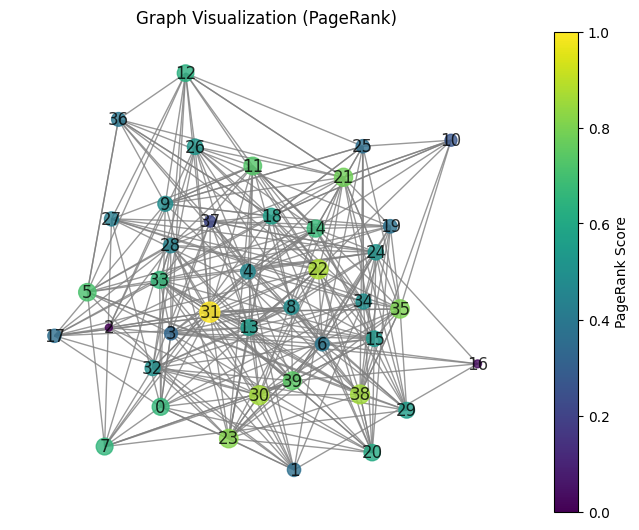

In [32]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a random graph
G = nx.fast_gnp_random_graph(40, 0.2, directed=True)

# Compute PageRank scores using NetworkX's built-in algorithm
pagerank_scores = nx.pagerank(G)

# Scale nodes based on PageRank scores
node_size = [pagerank_scores[node] * 5000 for node in G.nodes()]  # Scale up by a factor of 5000

# Visualize the graph with scaled nodes and lighter grey edges
pos = nx.spring_layout(G)  # Layout for visualization
node_colors = [pagerank_scores[node] for node in G.nodes()]
cmap = plt.cm.viridis  # Choose a colormap
nx.draw(G, pos, with_labels=True, node_size=node_size, node_color=node_colors, edge_color='grey', alpha=0.8, arrows=False)
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
plt.colorbar(sm, label='PageRank Score', ax=plt.gca())
plt.title('Graph Visualization (PageRank)')
plt.show()


In [29]:
pagerank_scores

{0: 0.05521732022029521,
 1: 0.05480196231297309,
 2: 0.019162482118216743,
 3: 0.03806042061568731,
 4: 0.032243229970854013,
 5: 0.06637609361079852,
 6: 0.11294064224273351,
 7: 0.0834290060090113,
 8: 0.022487546571573945,
 9: 0.025943272667072484,
 10: 0.05439647950306143,
 11: 0.02682035337564702,
 12: 0.02453274052937157,
 13: 0.06446237579051897,
 14: 0.04434478219730445,
 15: 0.096381057093413,
 16: 0.04119798489680566,
 17: 0.0692494392701663,
 18: 0.02349995890102679,
 19: 0.04445285210346864}

# other centrality measures on graphs

Centrality measures play a fundamental role in understanding the structure and significance of nodes within a graph or network. They quantify the importance, influence, or centrality of nodes based on various criteria. Here's a brief introduction to some common centrality measures:

1. **Degree Centrality**: This measure is straightforward and simply counts the number of edges connected to a node. Nodes with higher degree centrality are more connected to other nodes in the network and are often considered more important or influential.

2. **Closeness Centrality**: Closeness centrality quantifies how close a node is to all other nodes in the network. It is calculated as the reciprocal of the sum of the shortest path distances from a node to all other nodes. Nodes with higher closeness centrality are typically more central within the network and can communicate more efficiently with other nodes.

3. **Betweenness Centrality**: Betweenness centrality measures the extent to which a node lies on the shortest paths between other nodes in the network. Nodes with higher betweenness centrality act as bridges or intermediaries, facilitating communication and information flow between different parts of the network.

4. **PageRank Centrality**: PageRank is a centrality measure originally developed by Google to rank web pages in search results. It assigns a score to each node based on the concept of "importance." The score is recursively calculated based on the importance of nodes pointing to it. Nodes with higher PageRank scores are considered more important or influential.

These centrality measures provide valuable insights into the structure and dynamics of networks. They help identify key nodes, central actors, and critical pathways within a network, which can be crucial for understanding phenomena such as information dissemination, disease spread, and social influence.

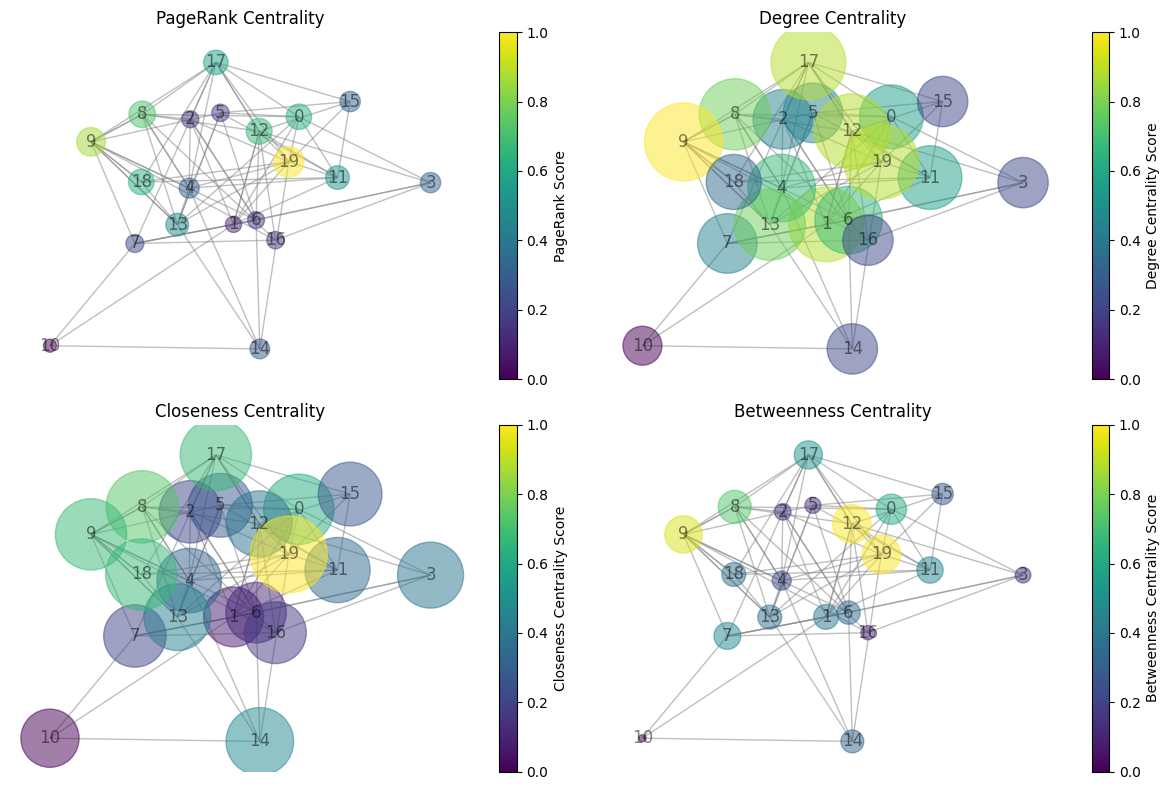

In [34]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a random graph
G = nx.fast_gnp_random_graph(20, 0.2, directed=True)

# Compute centrality measures
pagerank_scores = nx.pagerank(G)
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Scale nodes based on centrality scores
node_size_pagerank = [pagerank_scores[node] * 5000 for node in G.nodes()]  # Scale up by a factor of 5000
node_size_degree = [degree_centrality[node] * 5000 for node in G.nodes()]
node_size_closeness = [closeness_centrality[node] * 5000 for node in G.nodes()]
node_size_betweenness = [betweenness_centrality[node] * 5000 for node in G.nodes()]

# Visualize the graph with scaled nodes and lighter grey edges
pos = nx.spring_layout(G)  # Layout for visualization
cmap = plt.cm.viridis  # Choose a colormap

# Plot for PageRank
plt.figure(figsize=(12, 8))
plt.subplot(221)
nx.draw(G, pos, with_labels=True, node_size=node_size_pagerank, node_color=list(pagerank_scores.values()), cmap=cmap, edge_color='grey', alpha=0.5, arrows=False)
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
plt.colorbar(sm, label='PageRank Score', ax=plt.gca())
plt.title('PageRank Centrality')

# Plot for Degree Centrality
plt.subplot(222)
nx.draw(G, pos, with_labels=True, node_size=node_size_degree, node_color=list(degree_centrality.values()), cmap=cmap, edge_color='grey', alpha=0.5, arrows=False)
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
plt.colorbar(sm, label='Degree Centrality Score', ax=plt.gca())
plt.title('Degree Centrality')

# Plot for Closeness Centrality
plt.subplot(223)
nx.draw(G, pos, with_labels=True, node_size=node_size_closeness, node_color=list(closeness_centrality.values()), cmap=cmap, edge_color='grey', alpha=0.5, arrows=False)
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
plt.colorbar(sm, label='Closeness Centrality Score', ax=plt.gca())
plt.title('Closeness Centrality')

# Plot for Betweenness Centrality
plt.subplot(224)
nx.draw(G, pos, with_labels=True, node_size=node_size_betweenness, node_color=list(betweenness_centrality.values()), cmap=cmap, edge_color='grey', alpha=0.5, arrows=False)
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
plt.colorbar(sm, label='Betweenness Centrality Score', ax=plt.gca())
plt.title('Betweenness Centrality')

plt.tight_layout()
plt.show()
